##### 1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [163]:
import pandas as pd

us_top_100 = pd.read_csv('data/open_rank_20236.csv')
value_max = us_top_100['value'].max()
value_min = us_top_100['value'].min()
value_mean = us_top_100['value'].mean()
value_median = us_top_100['value'].median()

print("美国排名前100项目的value最大值:", value_max)
print("最小值:", value_min)
print("均值:", value_mean)
print("中位数:", value_median)


美国排名前100项目的value最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


##### 2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [164]:
df = pd.read_csv('data/activity_2022.csv')
months = [f'2022{month:d}_value' for month in range(1, 13)]
for i in range(1, len(months)):
    prev_value = df[months[i - 1]]
    current_value = df[months[i]]
    df[f'growth_{i}'] = (current_value - prev_value) / prev_value

growth_columns = [f'growth_{i}' for i in range(1, len(months))]
#print(df[growth_columns])

df['average_monthly_growth'] = df[growth_columns].mean(axis=1)
avg_growth_rate = df['average_monthly_growth'].mean()

print("总体平均月增长率：", avg_growth_rate)

总体平均月增长率： 0.012502691855077122


##### 3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [165]:
# 读取中国和全球数据
china_df = pd.read_csv('data/china_2022.csv')
global_df = pd.read_csv('data/global_2022.csv')

# 计算描述性统计信息
china_stats = china_df.describe()
global_stats = global_df.describe()

print("中国前十企业的统计数据:\n", china_stats)
print("全球前十企业的统计数据:\n", global_stats)


中国前十企业的统计数据:
        issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.25000

##### 4.贝叶斯定理

###### 贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

###### 根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

###### 非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

###### 工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

###### 已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [166]:
p_nsoftware = 0.25 #P(Non-software)=0.25
p_software = 0.75 #P(Software)=0.75
p_html_nsoftware = 0.85 #P(HTML | Non-software)=0.85
p_html_software = 0.10  #P(HTML | Software)=0.10

#P(Non-software | HTML)= P(HTML | Non-software)×P(Non-software)/P(HTML)

#P(HTML)=P(HTML | Non-software)×P(Non-software)+P(HTML | Software)×P(Software)

p_html = p_html_nsoftware * p_nsoftware + p_html_software * p_software

p_nsoftware_html = (p_html_nsoftware * p_nsoftware) / p_html

print("已知项目带有 HTML/Markdown 标签是非软件型项目的概率:", p_nsoftware_html)


已知项目带有 HTML/Markdown 标签是非软件型项目的概率: 0.7391304347826088


##### 5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [167]:
p_tool = 0.5 #P(Tool)=0.5
p_ntool = 0.5 #P(Non-tool)=0.5
p_js_tool = 0.35 #P(JavaScript | Tool)=0.35
p_js_ntool = 0.10 #P(JavaScript | Non-tool)=0.10
#P(Tool | JavaScript)=P( JavaScript| Tool)×P(Tool)/P(JavaScript)

#P(JavaScript)=P(JavaScript | Non-tool)×P(Non-tool)+P(JacaScript | Tool)×P(Tool)
p_js = p_js_tool * p_tool + p_js_ntool * p_ntool

p_tool_js = (p_js_tool * p_tool) / p_js
print("已知项目是由 JavaScript 语言编写且是工具组件型项目的概率:", p_tool_js)

已知项目是由 JavaScript 语言编写且是工具组件型项目的概率: 0.7777777777777778


##### 6.根据以下数据建立可视化无向图

###### user = [1, 2, 3, 4]

###### edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

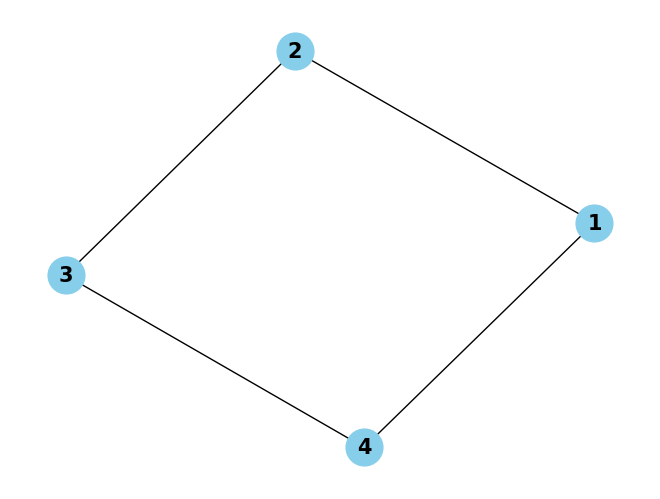

In [168]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", font_size=15, font_weight="bold")
plt.show()


##### 7.根据以下数据建立可视化有向图
###### users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

###### edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

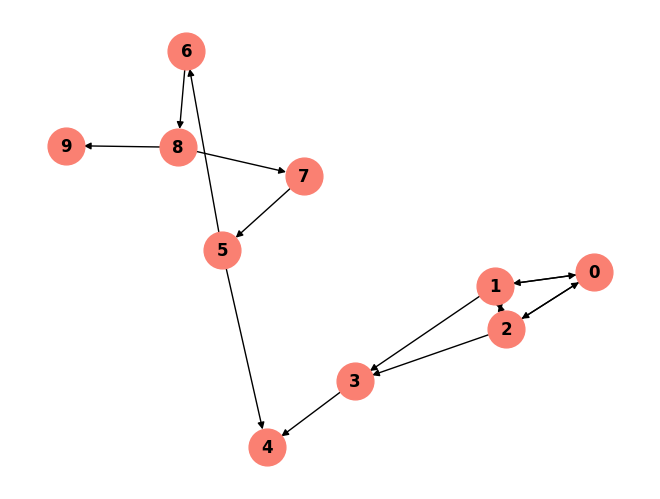

In [169]:
users = list(range(10))
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G_directed = nx.DiGraph()
G_directed.add_nodes_from(users)
G_directed.add_edges_from(edges)

nx.draw(G_directed, with_labels=True, node_size=700, node_color="salmon", font_size=12, font_weight="bold", arrows=True)
plt.show()


##### 8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

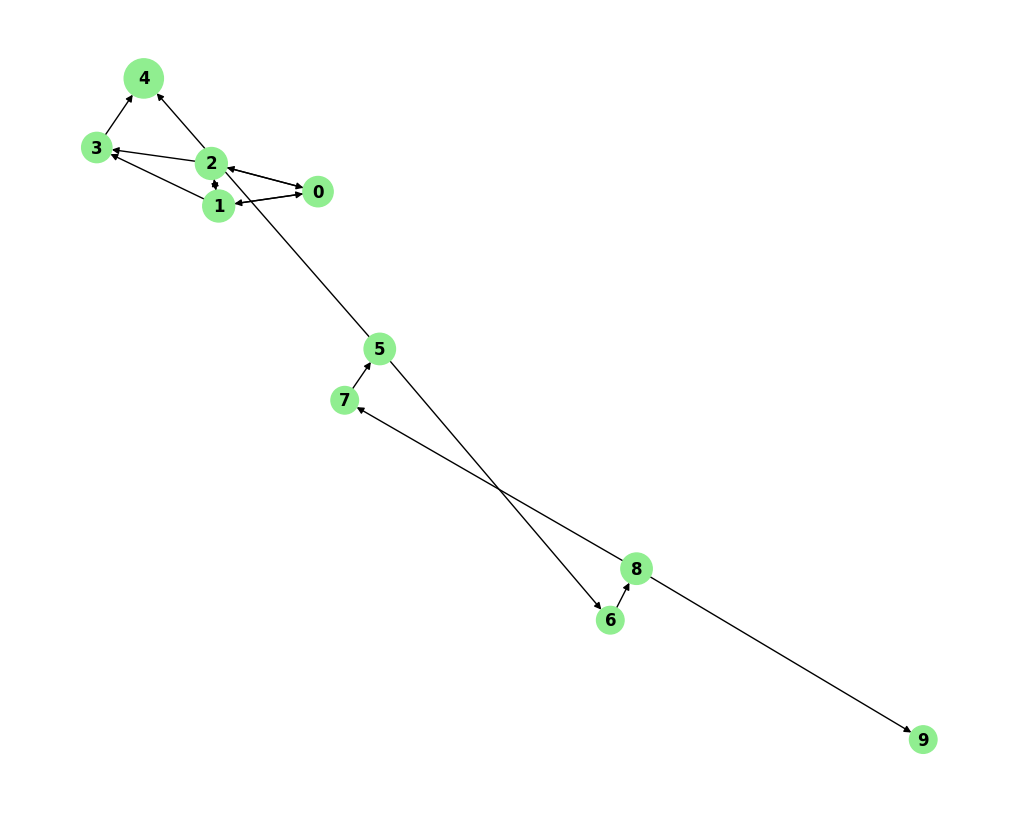

节点的PageRank值: {0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


In [170]:
pagerank_values = nx.pagerank(G_directed)

node_sizes = [pagerank_values[node] * 5000 for node in G_directed]

plt.figure(figsize=(10, 8))
nx.draw(G_directed, with_labels=True, node_size=node_sizes, node_color="lightgreen", font_size=12, font_weight="bold", arrows=True)
plt.show()

print("节点的PageRank值:", pagerank_values)
